In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [38]:
torch.manual_seed(42)

In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [40]:
df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
df.head

<bound method NDFrame.head of        label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pi

In [41]:
x = df.drop('label',axis = 1)
y = df.iloc[:,0]

In [42]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [43]:
x_train = x_train/255.0
x_test = x_test/255.0

In [44]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
918,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.003922,0.000000,0.011765,0.772549,0.858824,0.850980,0.372549,0.0
17141,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.505882,0.431373,0.352941,0.372549,0.525490,0.000000,0.000000,0.000000,0.000000,0.0
15558,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
27327,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.121569,0.274510,...,0.192157,0.223529,0.203922,0.203922,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
11606,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.007843,...,0.062745,0.000000,0.000000,0.011765,0.023529,0.015686,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.0,0.0,0.0,0.0,0.0,0.011765,0.027451,0.000000,0.000000,0.000000,...,0.682353,0.705882,0.768627,0.921569,0.000000,0.000000,1.000000,0.898039,0.650980,0.0
38158,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
860,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
15795,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.007843,0.000000,0.000000,...,0.368627,0.290196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


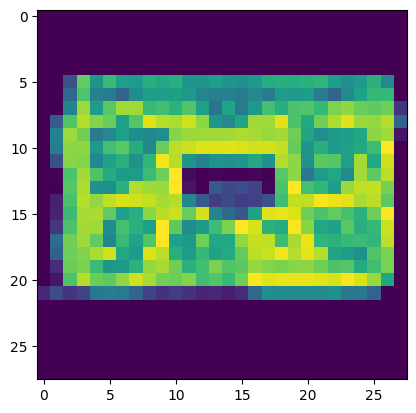

In [45]:
plt.imshow(x_train.iloc[245,:].values.reshape(28,28))

In [46]:
y_train

918      9
17141    8
15558    4
27327    2
11606    6
        ..
54343    2
38158    7
860      9
15795    4
56422    0
Name: label, Length: 42000, dtype: int64

In [47]:
class custom_dataset(Dataset):
    def __init__(self,num_features,num_labels):
        self.features = torch.tensor(num_features,dtype = torch.float32).reshape(-1,1,28,28)
        self.labels = torch.tensor(num_labels,dtype = torch.long)

    def __len__(self):
        return len(self.features)

    def __getitem__(self,index):
        return self.features[index],self.labels[index]

In [48]:
train_dataset = custom_dataset(x_train.values,y_train.values)
test_dataset = custom_dataset(x_test.values,y_test.values)
print(len(train_dataset))
print(len(test_dataset))

42000
18000


In [49]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle = True,pin_memory = True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle = True,pin_memory = True)

In [50]:
class MyNN(nn.Module):
    def __init__(self,input_features):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_features,32,kernel_size = 3,padding = 'same'),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size = 2,stride = 2),

            nn.Conv2d(32,64,kernel_size = 3, padding = 'same'),           
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size = 2,stride = 2)
            
            
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*7*7,128),
            nn.ReLU(),
            nn.Dropout(p=0.4),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Dropout(p=0.4),
            nn.Linear(64,10)
            
        )
    def forward(self,x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [51]:
learning_rate = 0.01
epochs = 50

In [52]:
model = MyNN(1)
model.to(device)

MyNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.4, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [53]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr = learning_rate)

In [54]:
for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features ,batch_labels in train_loader:
        batch_features,batch_labels = batch_features.to(device),batch_labels.to(device)
        y_pred = model(batch_features)

        loss = criterion(y_pred,batch_labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_epoch_loss = total_epoch_loss + loss.item()

    avg_loss = total_epoch_loss / len(train_loader)
    print(f'Epochs: {epoch+1} Loss : {avg_loss}')

Epochs: 1 Loss : 0.6812876383834274
Epochs: 2 Loss : 0.40473314174376457
Epochs: 3 Loss : 0.34472052558621014
Epochs: 4 Loss : 0.3036046694093139
Epochs: 5 Loss : 0.2722735120960982
Epochs: 6 Loss : 0.25355137736229433
Epochs: 7 Loss : 0.2351832448775112
Epochs: 8 Loss : 0.21755555263732512
Epochs: 9 Loss : 0.20376034666516699
Epochs: 10 Loss : 0.1869355166701193
Epochs: 11 Loss : 0.18044386684478908
Epochs: 12 Loss : 0.1706918969265237
Epochs: 13 Loss : 0.16014990896080186
Epochs: 14 Loss : 0.1497959531347146
Epochs: 15 Loss : 0.14408378022200138
Epochs: 16 Loss : 0.13065655383807007
Epochs: 17 Loss : 0.12508808889976714
Epochs: 18 Loss : 0.11965464198588048
Epochs: 19 Loss : 0.10869634413322284
Epochs: 20 Loss : 0.10827796204336221
Epochs: 21 Loss : 0.10073228625320263
Epochs: 22 Loss : 0.09587817943565581
Epochs: 23 Loss : 0.08863141081935703
Epochs: 24 Loss : 0.08678615979783086
Epochs: 25 Loss : 0.07866937613915524
Epochs: 26 Loss : 0.07729015232919256
Epochs: 27 Loss : 0.07881878

In [55]:
model.eval()

MyNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.4, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [56]:
with torch.no_grad():
    total = 0
    correct = 0
    for batch_features,batch_labels in test_loader:
        batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)
        output=model(batch_features)

        _,predicted=torch.max(output.data,1)
    
        total += batch_labels.size(0)
        correct += (predicted==batch_labels).sum().item()
    print(correct/total)

0.9021111111111111


In [57]:
with torch.no_grad():
    total = 0
    correct = 0
    for batch_features,batch_labels in train_loader:
        batch_features,batch_labels=batch_features.to(device),batch_labels.to(device)
        output=model(batch_features)

        _,predicted=torch.max(output.data,1)
    
        total += batch_labels.size(0)
        correct += (predicted==batch_labels).sum().item()
    print(correct/total)

0.9747857142857143
